<a href="https://colab.research.google.com/github/eliazulai29/tensor/blob/main/03_convolutional_neural_networks_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import datetime
print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")

Notebook last run (end-to-end): 2023-11-01 16:50:09.403292


In [1]:
import tensorflow as tf
print(tf.__version__)

2.14.0


In [3]:
import zipfile

# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-11-01 20:53:20--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.191.207, 173.194.74.207, 173.194.192.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.191.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   130MB/s    in 0.8s    

2023-11-01 20:53:21 (130 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [3]:
!ls pizza_steak/

test  train


In [4]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.


In [5]:
num_steak_images_train = len(os.listdir("/content/pizza_steak/train/steak"))

num_steak_images_train

750

In [6]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [7]:
pathlib.Path("pizza_steak/train/")

PosixPath('pizza_steak/train')

In [8]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image[0])

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img



In [9]:
# target_dir="pizza_steak/train/"
# target_class="steak"
# target_folder = target_dir + target_class
# target_folder

2125877.jpg
Image shape: (288, 512, 3)


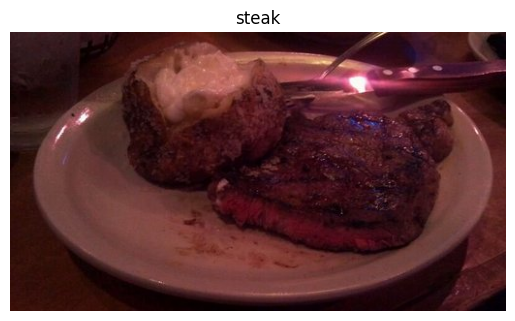

In [10]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

In [11]:
target_dir="pizza_steak/train/"
target_class="steak"
target_folder = target_dir + target_class
target_folder

'pizza_steak/train/steak'

In [12]:
# View the img (actually just a big array/tensor)
img

array([[[57, 30, 35],
        [54, 27, 32],
        [53, 26, 31],
        ...,
        [41, 21, 23],
        [39, 17, 20],
        [39, 17, 20]],

       [[55, 28, 33],
        [53, 26, 31],
        [54, 27, 32],
        ...,
        [35, 15, 17],
        [33, 13, 15],
        [33, 13, 15]],

       [[54, 27, 32],
        [53, 26, 31],
        [54, 27, 32],
        ...,
        [32, 13, 17],
        [31, 12, 16],
        [32, 13, 17]],

       ...,

       [[58, 15,  8],
        [59, 16,  9],
        [59, 16,  9],
        ...,
        [ 7,  0,  8],
        [ 7,  0,  8],
        [ 7,  0,  8]],

       [[58, 15,  8],
        [58, 15,  8],
        [58, 15,  8],
        ...,
        [ 7,  0,  8],
        [ 7,  0,  8],
        [ 7,  0,  8]],

       [[58, 15,  8],
        [57, 14,  7],
        [57, 14,  7],
        ...,
        [ 7,  0,  8],
        [ 7,  0,  8],
        [ 7,  0,  8]]], dtype=uint8)

In [13]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(288, 512, 3), dtype=uint8, numpy=
array([[[57, 30, 35],
        [54, 27, 32],
        [53, 26, 31],
        ...,
        [41, 21, 23],
        [39, 17, 20],
        [39, 17, 20]],

       [[55, 28, 33],
        [53, 26, 31],
        [54, 27, 32],
        ...,
        [35, 15, 17],
        [33, 13, 15],
        [33, 13, 15]],

       [[54, 27, 32],
        [53, 26, 31],
        [54, 27, 32],
        ...,
        [32, 13, 17],
        [31, 12, 16],
        [32, 13, 17]],

       ...,

       [[58, 15,  8],
        [59, 16,  9],
        [59, 16,  9],
        ...,
        [ 7,  0,  8],
        [ 7,  0,  8],
        [ 7,  0,  8]],

       [[58, 15,  8],
        [58, 15,  8],
        [58, 15,  8],
        ...,
        [ 7,  0,  8],
        [ 7,  0,  8],
        [ 7,  0,  8]],

       [[58, 15,  8],
        [57, 14,  7],
        [57, 14,  7],
        ...,
        [ 7,  0,  8],
        [ 7,  0,  8],
        [ 7,  0,  8]]], dtype=uint8)>

In [14]:
# View the image shape
img.shape # returns (width, height, colour channels)

(288, 512, 3)

In [15]:
# Get all the pixel values between 0 & 1
img/255.

array([[[0.22352941, 0.11764706, 0.1372549 ],
        [0.21176471, 0.10588235, 0.1254902 ],
        [0.20784314, 0.10196078, 0.12156863],
        ...,
        [0.16078431, 0.08235294, 0.09019608],
        [0.15294118, 0.06666667, 0.07843137],
        [0.15294118, 0.06666667, 0.07843137]],

       [[0.21568627, 0.10980392, 0.12941176],
        [0.20784314, 0.10196078, 0.12156863],
        [0.21176471, 0.10588235, 0.1254902 ],
        ...,
        [0.1372549 , 0.05882353, 0.06666667],
        [0.12941176, 0.05098039, 0.05882353],
        [0.12941176, 0.05098039, 0.05882353]],

       [[0.21176471, 0.10588235, 0.1254902 ],
        [0.20784314, 0.10196078, 0.12156863],
        [0.21176471, 0.10588235, 0.1254902 ],
        ...,
        [0.1254902 , 0.05098039, 0.06666667],
        [0.12156863, 0.04705882, 0.0627451 ],
        [0.1254902 , 0.05098039, 0.06666667]],

       ...,

       [[0.22745098, 0.05882353, 0.03137255],
        [0.23137255, 0.0627451 , 0.03529412],
        [0.23137255, 0

## end to end example
* load images
* preprocess images (between 0-1)
* build CNN to find patterns in our images
* compile our CNN
* fit the CNN to our train data

In [16]:
# import tensorflow as tf
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# # set the seed
# tf.random.set_seed(42)

# # Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
# train_datagen = ImageDataGenerator(rescale=1./255)
# valid_datagen = ImageDataGenerator(rescale=1./255)

# # Setup the train and test directories
# train_dir = "pizza_steak/train/"
# test_dir = "pizza_steak/test/"

# # Import data from directories and turn it into batches
# train_data = train_datagen.flow_from_directory(train_dir,
#                                                batch_size=32, # number of images to process at a time
#                                                target_size=(224, 224), # convert all images to be 224 x 224
#                                                class_mode="binary", # type of problem we're working on
#                                                seed=42)

# valid_data = valid_datagen.flow_from_directory(test_dir,
#                                                batch_size=32,
#                                                target_size=(224, 224),
#                                                class_mode="binary",
#                                                seed=42)

# # Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
# model_1 = tf.keras.models.Sequential([
#   tf.keras.layers.Conv2D(filters=10,
#                          kernel_size=3, # can also be (3, 3)
#                          activation="relu",
#                          input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
#   tf.keras.layers.Conv2D(10, 3, activation="relu"),
#   tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
#                             padding="valid"), # padding can also be 'same'
#   tf.keras.layers.Conv2D(10, 3, activation="relu"),
#   tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
#   tf.keras.layers.MaxPool2D(2),
#   tf.keras.layers.Flatten(),
#   tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
# ])

# # Compile the model
# model_1.compile(loss="binary_crossentropy",
#               optimizer=tf.keras.optimizers.Adam(),
#               metrics=["accuracy"])

# # Fit the model
# history_1 = model_1.fit(train_data,
#                         epochs=5,
#                         steps_per_epoch=len(train_data),
#                         validation_data=valid_data,
#                         validation_steps=len(valid_data))



In [17]:
# # get model_1 summery
# model_1.summary()

In [18]:
# # Set random seed
# tf.random.set_seed(42)

# # Create a model to replicate the TensorFlow Playground model
# model_2 = tf.keras.Sequential([
#   tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dimensional vector as input
#   tf.keras.layers.Dense(4, activation='relu'),
#   tf.keras.layers.Dense(4, activation='relu'),
#   tf.keras.layers.Dense(1, activation='sigmoid')
# ])

# # Compile the model
# model_2.compile(loss='binary_crossentropy',
#               optimizer=tf.keras.optimizers.Adam(),
#               metrics=["accuracy"])

# # Fit the model
# history_2 = model_2.fit(train_data, # use same training data created above
#                         epochs=5,
#                         steps_per_epoch=len(train_data),
#                         validation_data=valid_data, # use same validation data created above
#                         validation_steps=len(valid_data))

In [19]:
# model_2.summary()

In [20]:
# # Set random seed
# tf.random.set_seed(42)

# # Create a model similar to model_1 but add an extra layer and increase the number of hidden units in each layer
# model_3 = tf.keras.Sequential([
#   tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dimensional vector as input
#   tf.keras.layers.Dense(100, activation='relu'), # increase number of neurons from 4 to 100 (for each layer)
#   tf.keras.layers.Dense(100, activation='relu'),
#   tf.keras.layers.Dense(100, activation='relu'), # add an extra layer
#   tf.keras.layers.Dense(1, activation='sigmoid')
# ])

# # Compile the model
# model_3.compile(loss='binary_crossentropy',
#               optimizer=tf.keras.optimizers.Adam(),
#               metrics=["accuracy"])

# # Fit the model
# history_3 = model_3.fit(train_data,
#                         epochs=5,
#                         steps_per_epoch=len(train_data),
#                         validation_data=valid_data,
#                         validation_steps=len(valid_data))

In [21]:
len(train_data)

NameError: ignored

In [ ]:
# # Check out model_3 architecture
# model_3.summary()

# Binary classification: Let's break it down
We just went through a whirlwind of steps:

* Become one with the data (visualize, visualize, visualize...)
* Preprocess the data (prepare it for a model)
* Create a model (start with a baseline)
* Fit the model
* Evaluate the model
* Adjust different parameters and improve model (try to beat your baseline)
* Repeat until satisfied

# 1.Import and become one with the data

3670607.jpg
Image shape: (512, 512, 3)
82578.jpg
Image shape: (384, 512, 3)


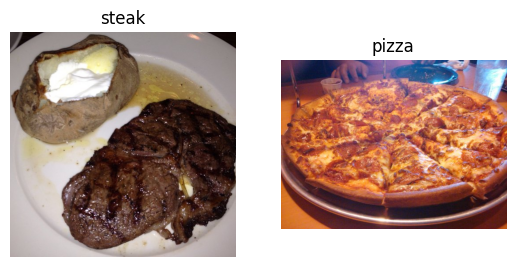

In [22]:
# Visualize data (requires function 'view_random_image' above)
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

# 2. Preprocess the data (prepare it for a model)

In [23]:
# Define training and test directory paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

In [ ]:
train_dir

In [24]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
train_datagen

In [25]:
# Turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Get a sample of the training data batch
images, labels = train_data.next() # get the 'next' batch of images/labels
len(images), len(labels)

In [ ]:
# Get the first two images
images[0].shape, images[:2]

In [ ]:
# Get a sample of the training data batch
images, labels = train_data.next() # get the 'next' batch of images/labels
len(images), len(labels)

In [ ]:
# View the first batch of labels
labels

# 3.Create a model (start with a baseline)

In [26]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
# # Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
# model_4 = Sequential([
#     Conv2D(filters=10,
#            kernel_size=3,
#            strides=1,
#            padding='valid',
#            activation='relu',
#            input_shape=(224, 224, 3)), # input layer (specify input shape))
#     Conv2D(10, 3, activation='relu'),
#     Conv2D(10, 3, activation='relu'),
#     Flatten(),
#     Dense(1, activation='sigmoid') # output layer (specify output shape)

# ])

In [ ]:
# # Compile the model
# model_4.compile(loss='binary_crossentropy',
#                 optimizer=Adam(),
#                 metrics=['accuracy'])

In [ ]:
# model_4.summary()

# 4. Fit a model

In [ ]:
# # Check lengths of training and test data generators
# len(train_data), len(test_data)

In [ ]:
# # Fit the model
# history_4 = model_4.fit(train_data,
#                         epochs=5,
#                         steps_per_epoch=len(train_data),
#                         validation_data=test_data,
#                         validation_steps=len(test_data))

# 5. Evaluate the model


In [ ]:
# # Plot the training curves
# import pandas as pd
# pd.DataFrame(history_4.history).plot(figsize=(10, 7));

In [27]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

In [ ]:
# # Check out the loss curves of model_4
# plot_loss_curves(history_4)

In [ ]:
# history_4.history

In [ ]:
# # Check out our model's architecture
# model_4.summary()

# 6. Adjust the model parameters


In [ ]:
# # Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
# model_5 = Sequential([
#   Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
#   MaxPool2D(pool_size=2), # reduce number of features by half
#   Conv2D(10, 3, activation='relu'),
#   MaxPool2D(),
#   Conv2D(10, 3, activation='relu'),
#   MaxPool2D(),
#   Flatten(),
#   Dense(1, activation='sigmoid')
# ])

In [ ]:
# # Compile model (same as model_4)
# model_5.compile(loss='binary_crossentropy',
#                 optimizer=Adam(),
#                 metrics=['accuracy'])

In [ ]:
# # Fit the model
# history_5 = model_5.fit(train_data,
#                         epochs=5,
#                         steps_per_epoch=len(train_data),
#                         validation_data=test_data,
#                         validation_steps=len(test_data))

In [ ]:
# # Check out the model architecture
# model_5.summary()

In [ ]:
# # Plot loss curves of model_5 results
# plot_loss_curves(history_5)

In [28]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

In [29]:
# Import data and augment it from training directory
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False) # Don't shuffle for demonstration purposes, usually a good thing to shuffle

# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=True) # Don't shuffle for demonstration purposes

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Augmented training images:
Found 1500 images belonging to 2 classes.
Non-augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


In [31]:
# Get data batch samples
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # Note: labels aren't augmented, they stay the same

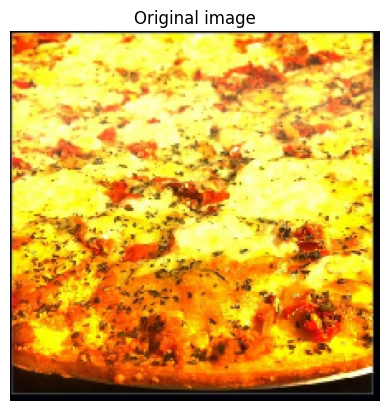

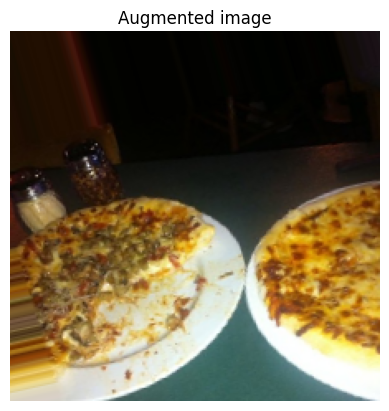

In [32]:
# Show original image and augmented image
random_number = random.randint(0, 31) # we're making batches of size 32, so we'll get a random instance
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

In [33]:
# Create the model (same as model_5)
model_6 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_6 = model_6.fit(train_data_augmented, # changed to augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))


Epoch 1/5
47/47 [==============================] - 36s 464ms/step - loss: 0.7075 - accuracy: 0.4380 - val_loss: 0.6917 - val_accuracy: 0.5120
Epoch 2/5
47/47 [==============================] - 22s 469ms/step - loss: 0.6940 - accuracy: 0.5267 - val_loss: 0.6876 - val_accuracy: 0.5200
Epoch 3/5
47/47 [==============================] - 21s 457ms/step - loss: 0.6909 - accuracy: 0.5227 - val_loss: 0.6697 - val_accuracy: 0.6800
Epoch 4/5
47/47 [==============================] - 23s 474ms/step - loss: 0.6805 - accuracy: 0.5880 - val_loss: 0.6680 - val_accuracy: 0.6820
Epoch 5/5
47/47 [==============================] - 23s 495ms/step - loss: 0.6644 - accuracy: 0.6487 - val_loss: 0.5832 - val_accuracy: 0.7440


In [ ]:
# Check model's performance history training on augmented data
plot_loss_curves(history_6)

In [34]:
# Import data and augment it from directories
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode='binary',
                                                                            shuffle=True) # Shuffle data (default)

Found 1500 images belonging to 2 classes.


In [35]:
# Create the model (same as model_5 and model_6)
model_7 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled, # now the augmented data is shuffled
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 30s 610ms/step - loss: 0.6435 - accuracy: 0.6187 - val_loss: 0.4729 - val_accuracy: 0.7960
Epoch 2/5
47/47 [==============================] - 22s 464ms/step - loss: 0.5206 - accuracy: 0.7333 - val_loss: 0.4500 - val_accuracy: 0.7700
Epoch 3/5
47/47 [==============================] - 22s 477ms/step - loss: 0.4698 - accuracy: 0.7913 - val_loss: 0.3362 - val_accuracy: 0.8620
Epoch 4/5
47/47 [==============================] - 21s 452ms/step - loss: 0.4586 - accuracy: 0.7967 - val_loss: 0.3206 - val_accuracy: 0.8720
Epoch 5/5
47/47 [==============================] - 34s 731ms/step - loss: 0.4525 - accuracy: 0.7840 - val_loss: 0.3179 - val_accuracy: 0.8700


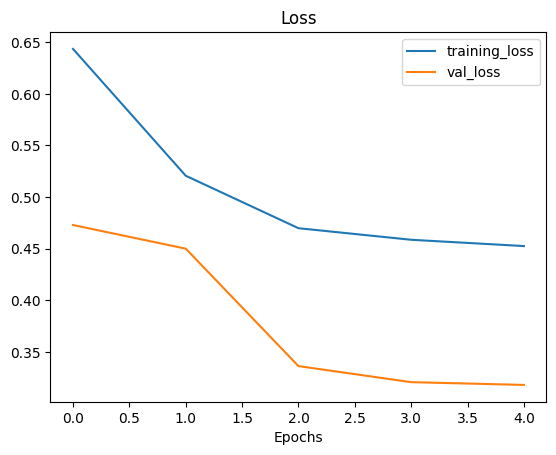

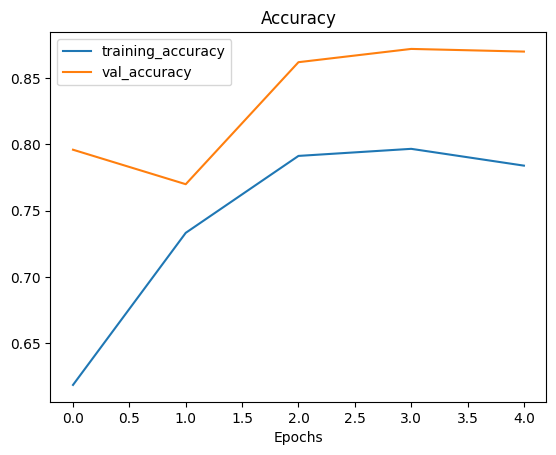

In [36]:
# Check model's performance history training on augmented data
plot_loss_curves(history_7)

In [37]:
# Create a CNN model (same as Tiny VGG but for binary classification - https://poloclub.github.io/cnn-explainer/ )
model_8 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)), # same input shape as our images
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_8 = model_8.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 26s 490ms/step - loss: 0.6137 - accuracy: 0.6693 - val_loss: 0.4162 - val_accuracy: 0.8280
Epoch 2/5
47/47 [==============================] - 22s 476ms/step - loss: 0.5394 - accuracy: 0.7367 - val_loss: 0.3961 - val_accuracy: 0.8420
Epoch 3/5
47/47 [==============================] - 23s 484ms/step - loss: 0.5259 - accuracy: 0.7367 - val_loss: 0.4198 - val_accuracy: 0.8320
Epoch 4/5
47/47 [==============================] - 25s 535ms/step - loss: 0.5073 - accuracy: 0.7613 - val_loss: 0.3848 - val_accuracy: 0.8420
Epoch 5/5
47/47 [==============================] - 22s 468ms/step - loss: 0.4882 - accuracy: 0.7793 - val_loss: 0.3484 - val_accuracy: 0.8520


In [40]:
# Check model_1 architecture (same as model_8)
model_8.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_7 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 110, 110, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_9 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                 

In [ ]:
# Classes we're working with
print(class_names)

In [9]:
import matplotlib.image as mpimg


--2023-11-01 20:59:19--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg.3’

03-steak.jpeg.3     100%[===================>]   1.89M  --.-KB/s    in 0.07s   

2023-11-01 20:59:19 (28.8 MB/s) - ‘03-steak.jpeg.3’ saved [1978213/1978213]



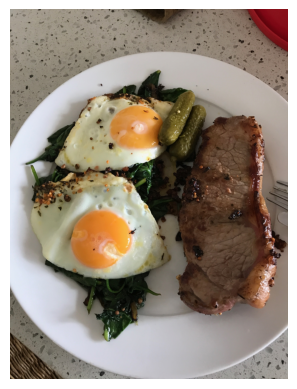

In [10]:
# View our example image
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [11]:
# Check the shape of our image
steak.shape

(4032, 3024, 3)

In [12]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [ ]:
# Load in and preprocess our custom image
steak = load_and_prep_image("03-steak.jpeg")
steak

In [ ]:
# Add an extra axis
print(f"Shape before new dimension: {steak.shape}")
steak = tf.expand_dims(steak, axis=0) # add an extra dimension at axis 0
#steak = steak[tf.newaxis, ...] # alternative to the above, '...' is short for 'every other dimension'
print(f"Shape after new dimension: {steak.shape}")
steak

In [ ]:
# We can index the predicted class by rounding the prediction probability
pred_class = class_names[int(tf.round(pred)[0][0])]
pred_class

In [ ]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

In [ ]:
# Test our model on a custom image
pred_and_plot(model_8, "03-steak.jpeg", class_names)

# Multi-class Classification
* Become one with the data (visualize, visualize, visualize...)
* Preprocess the data (prepare it for a model)
* Create a model (start with a baseline)
* Fit the model
* Evaluate the model
* Adjust different parameters and improve model (try to beat your baseline)
* Repeat until satisfied

In [1]:
import zipfile

# Download zip file of 10_food_classes images
# See how this data was created - https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-11-04 16:17:41--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.143.207, 173.194.69.207, 173.194.79.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.143.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  27.3MB/s    in 18s     

2023-11-04 16:17:59 (27.5 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [2]:
import os

# Walk through 10_food_classes directory and list number of files
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.

In [3]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [4]:
train_dir

'10_food_classes_all_data/train/'

In [5]:
# Get the class names for our multi-class dataset
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [6]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image[0])

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

In [13]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

In [35]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [33]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

232573.jpg
Image shape: (512, 382, 3)


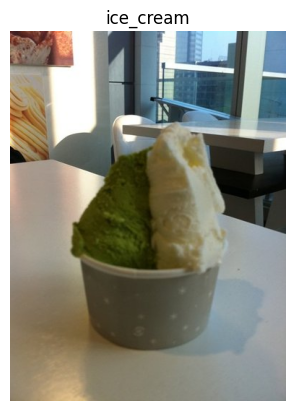

In [7]:
# View a random image from the training dataset
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names)) # get a random class name

2. Preprocess the data (prepare it for a model)

In [8]:
from matplotlib import scale
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Rescale the data and create data generator instances
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               class_mode='categorical',
                                               batch_size= 32)
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             class_mode ='categorical',
                                             batch_size= 32)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


3. Create a model (start with a baseline)

Namely:

* Changing the output layer to use have 10 ouput neurons (the same number as the number of classes we have).
* Changing the output layer to use 'softmax' activation instead of 'sigmoid' activation.
* Changing the loss function to be 'categorical_crossentropy' instead of 'binary_crossentropy'

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

# Create our model (a clone of model_8, except to be multi-class)
model_9 = Sequential([
    Conv2D(10,3, activation='relu', input_shape=(224,224,3)),
    Conv2D(10,3, activation='relu'),
    MaxPool2D(),
    Conv2D(10,3, activation='relu'),
    Conv2D(10,3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')
])

# Compile the model
model_9.compile(loss='categorical_crossentropy',
                optimizer= tf.keras.optimizers.Adam(),
                metrics=['accuracy'])


4. Fit a model

In [10]:
len(train_data), len(test_data)

(235, 79)

In [16]:
# Fit the model
history_9 = model_9.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 31s 130ms/step - loss: 0.1141 - accuracy: 0.9663 - val_loss: 5.0026 - val_accuracy: 0.2780
Epoch 2/5
235/235 [==============================] - 35s 149ms/step - loss: 0.0844 - accuracy: 0.9751 - val_loss: 5.2008 - val_accuracy: 0.2624
Epoch 3/5
235/235 [==============================] - 35s 150ms/step - loss: 0.0331 - accuracy: 0.9917 - val_loss: 6.0931 - val_accuracy: 0.2720
Epoch 4/5
235/235 [==============================] - 30s 126ms/step - loss: 0.0217 - accuracy: 0.9941 - val_loss: 6.7612 - val_accuracy: 0.2556
Epoch 5/5
235/235 [==============================] - 32s 136ms/step - loss: 0.0153 - accuracy: 0.9957 - val_loss: 6.9879 - val_accuracy: 0.2628


5. Evaluate the model

In [17]:
# Evaluate on the test data
model_9.evaluate(test_data)

79/79 [==============================] - 7s 88ms/step - loss: 6.9879 - accuracy: 0.2628


[6.987892150878906, 0.262800008058548]

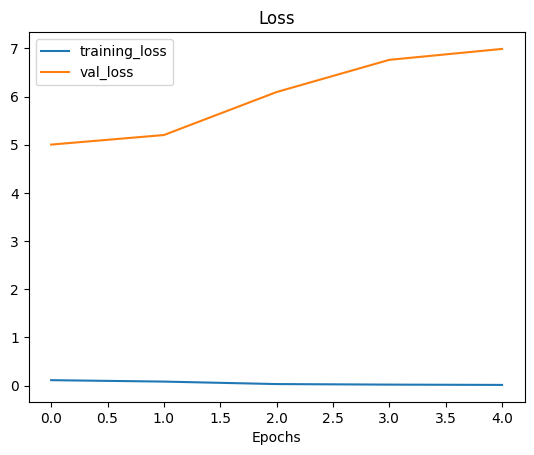

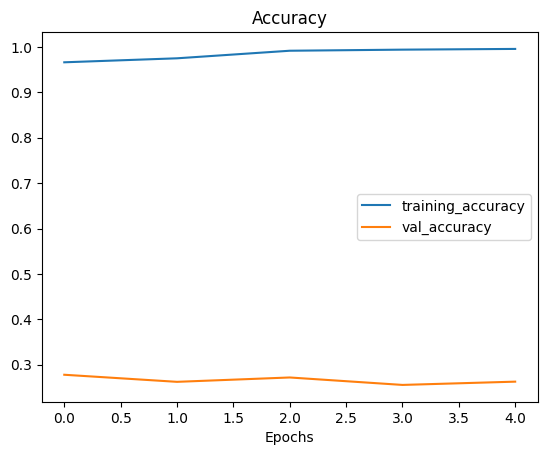

In [19]:
# Check out the model's loss curves on the 10 classes of data (note: this function comes from above in the notebook)
plot_loss_curves(history_9)

6. Adjust the model parameters
* Get more data - Having more data gives the model more opportunities to learn patterns, patterns which may be more generalizable to new examples.
* Simplify model - If the current model is already overfitting the training data, it may be too complicated of a model. This means it's learning the patterns of the data too well and isn't able to generalize well to unseen data. One way to simplify a model is to reduce the number of layers it uses or to reduce the number of hidden units in each layer.
* Use data augmentation - Data augmentation manipulates the training data in a way so that's harder for the model to learn as it artificially adds more variety to the data. If a model is able to learn patterns in augmented data, the model may be able to generalize better to unseen data.
* Use transfer learning - Transfer learning involves leverages the patterns (also called pretrained weights) one model has learned to use as the foundation for your own task. In our case, we could use one computer vision model pretrained on a large variety of images and then tweak it slightly to be more specialized for food images.

In [24]:
# Try a simplified model (removed two layers)
model_10 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax')
])

model_10.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

history_10 = model_10.fit(train_data,
                          epochs=5,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 37s 149ms/step - loss: 2.1559 - accuracy: 0.2191 - val_loss: 2.0542 - val_accuracy: 0.2772
Epoch 2/5
235/235 [==============================] - 42s 178ms/step - loss: 1.8448 - accuracy: 0.3605 - val_loss: 1.8518 - val_accuracy: 0.3552
Epoch 3/5
235/235 [==============================] - 40s 169ms/step - loss: 1.5231 - accuracy: 0.4884 - val_loss: 1.8901 - val_accuracy: 0.3360
Epoch 4/5
235/235 [==============================] - 42s 180ms/step - loss: 1.0999 - accuracy: 0.6412 - val_loss: 2.1475 - val_accuracy: 0.3216
Epoch 5/5
235/235 [==============================] - 32s 135ms/step - loss: 0.6607 - accuracy: 0.7999 - val_loss: 2.4291 - val_accuracy: 0.3216


In [21]:
train_dir

'10_food_classes_all_data/train/'

In [25]:
# Create augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255,
                                             rotation_range=20, # note: this is an int not a float
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   class_mode='categorical')


Found 7500 images belonging to 10 classes.


In [27]:
# Clone the model (use the same architecture)
model_11 = tf.keras.models.clone_model(model_10)

# Compile the cloned model (same setup as used for model_10)
model_11.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_11 = model_11.fit(train_data_augmented,
             epochs=5,
             steps_per_epoch=len(train_data_augmented),
             validation_data=test_data,
             validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 122s 516ms/step - loss: 2.3042 - accuracy: 0.1471 - val_loss: 2.1487 - val_accuracy: 0.2360
Epoch 2/5
235/235 [==============================] - 120s 513ms/step - loss: 2.1397 - accuracy: 0.2287 - val_loss: 2.0715 - val_accuracy: 0.2544
Epoch 3/5
235/235 [==============================] - 120s 511ms/step - loss: 2.0909 - accuracy: 0.2572 - val_loss: 1.9865 - val_accuracy: 0.2996
Epoch 4/5
235/235 [==============================] - 120s 508ms/step - loss: 2.0546 - accuracy: 0.2675 - val_loss: 1.9051 - val_accuracy: 0.3396
Epoch 5/5
235/235 [==============================] - 122s 518ms/step - loss: 2.0319 - accuracy: 0.2881 - val_loss: 1.8970 - val_accuracy: 0.3368


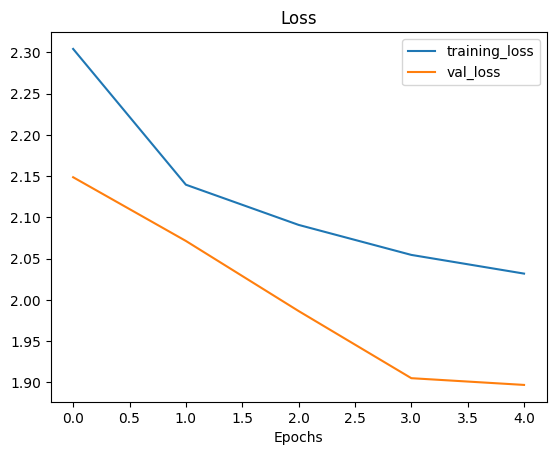

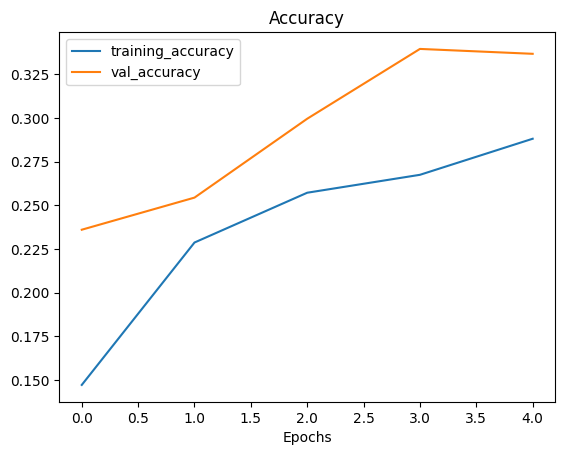

In [28]:
# Check out our model's performance with augmented data
plot_loss_curves(history_11)

In [29]:
# What classes has our model been trained on?
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [30]:
# -q is for "quiet"
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

1/1 [==============================] - 0s 19ms/step


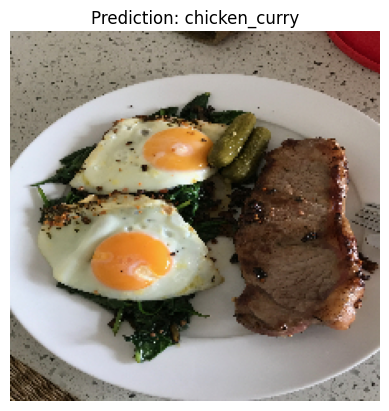

In [37]:
# Make a prediction using model_11
pred_and_plot(model=model_11,
              filename="03-steak.jpeg",
              class_names=class_names)

1/1 [==============================] - 0s 28ms/step


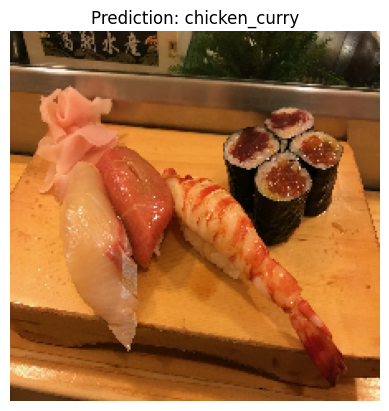

In [38]:
pred_and_plot(model_11, "03-sushi.jpeg", class_names)

1/1 [==============================] - 0s 21ms/step


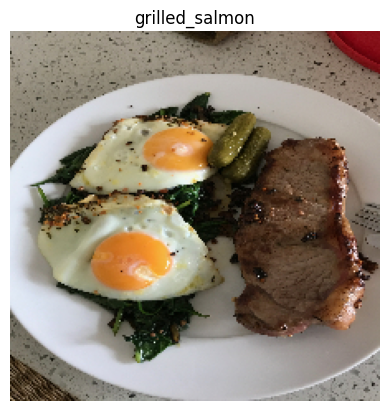

In [40]:
# Load in and preprocess our custom image
img = load_and_prep_image("03-steak.jpeg")

# Make a prediction
pred = model_11.predict(tf.expand_dims(img, axis=0))

# Match the prediction class to the highest prediction probability
pred_class = class_names[pred.argmax()]
plt.imshow(img)
plt.title(pred_class)
plt.axis(False);

In [41]:
# Check the output of the predict function
pred = model_11.predict(tf.expand_dims(img, axis=0))
pred

1/1 [==============================] - 0s 20ms/step


array([[0.0763026 , 0.07058313, 0.09505475, 0.2586315 , 0.08499335,
        0.04617735, 0.03199321, 0.08284793, 0.19463071, 0.05878549]],
      dtype=float32)

In [42]:
# Find the predicted class name
class_names[pred.argmax()]

'grilled_salmon'

In [43]:
# Adjust function to work with multi-class
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 54ms/step


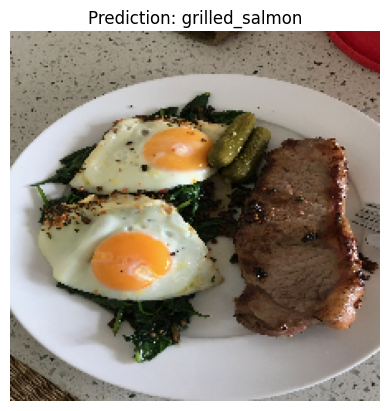

In [44]:
pred_and_plot(model_11, "03-steak.jpeg", class_names)

In [45]:
# Save a model
model_11.save("saved_trained_model")

In [46]:
# Load in a model and evaluate it
loaded_model_11 = tf.keras.models.load_model("saved_trained_model")
loaded_model_11.evaluate(test_data)

79/79 [==============================] - 8s 86ms/step - loss: 1.8970 - accuracy: 0.3368


[1.896962285041809, 0.3368000090122223]